In [290]:
#import libraries for analysis:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['figure.figsize'] = (20 , 20)

In [291]:
# download dataset
!curl -L -o ./data/ipl.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/158/850/original/IPL_2008-2024.csv?1760202529"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0  1002k      0 --:--:-- --:--:-- --:--:-- 1006k


# 📝 Question 1: Data Preprocessing & Feature Engineering (15 points)

### Task:

1. Load the IPL dataset and perform comprehensive EDA
2. Handle missing values appropriately with justification
3. Create these new features:
   - `home_advantage`: Boolean indicating if team1 is playing in their home city
   - `match_importance`: Categorical (league/playoff/final) based on date and season
   - `toss_advantage`: Whether toss winner won the match
   - `season_phase`: Early/Mid/Late season

### Deliverables:

- Clean dataset with no missing values
- Visualization showing distribution of matches across venues
- Statistical summary of win percentages for toss winners


In [292]:
# load dataset
df = pd.read_csv('./data/ipl.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## EDA on indivisual columns:


## 1. city


Percentage of missing data: 4.66


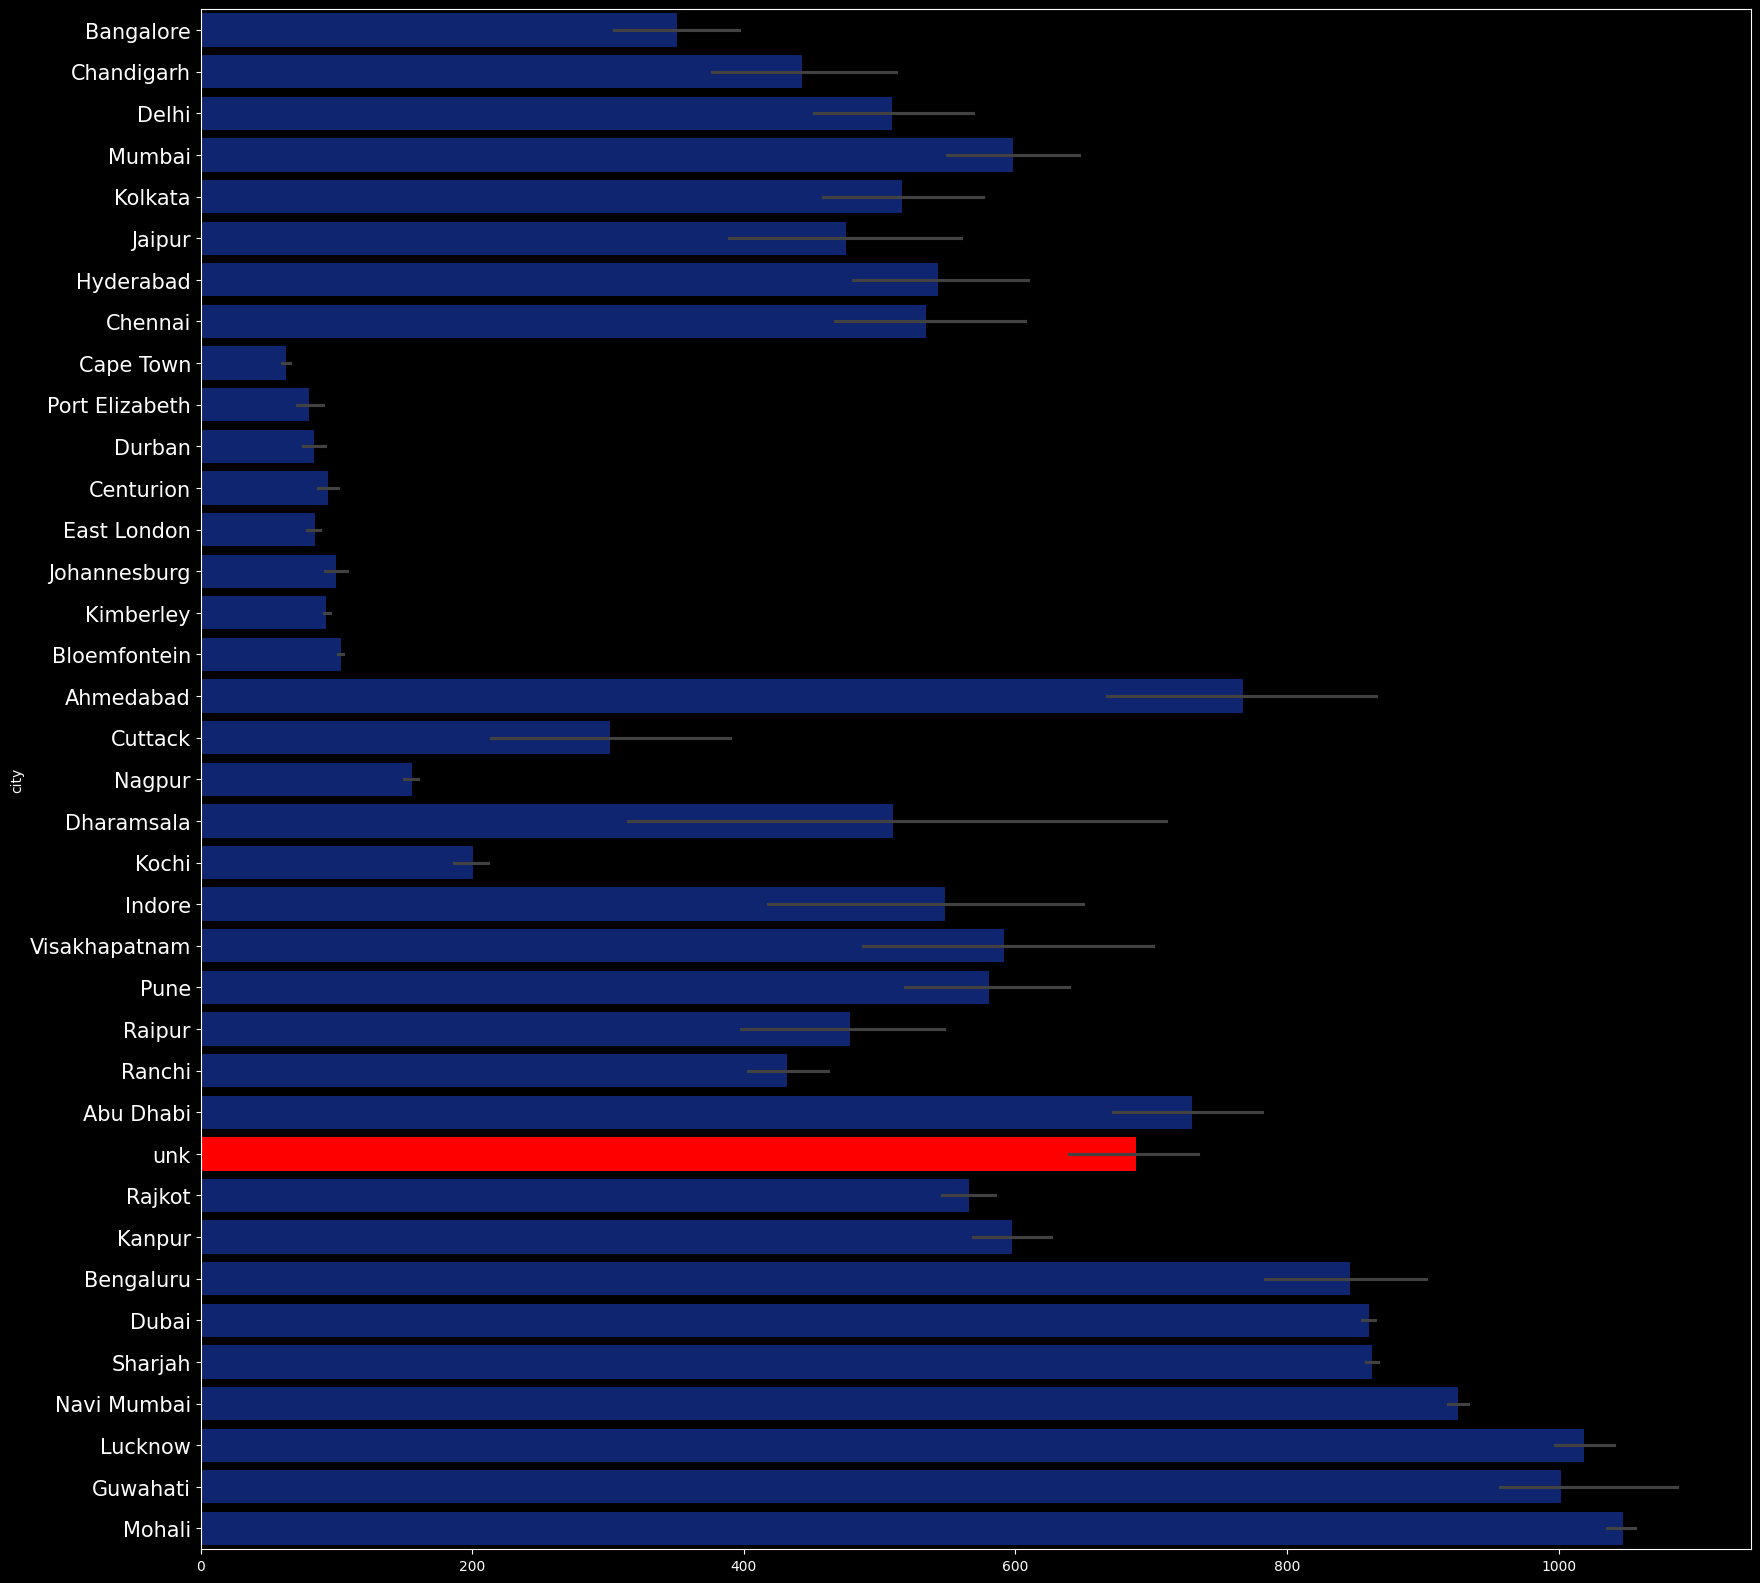

In [294]:
# skip features such as id and session since they are not-null
# columns to check = ['city' , 'player_of_match' , 'winner' , 'result_margin' , 'target_runs/overs' , 'method']

# 1. city:
city = df['city']

pmissing = (np.sum(city.isnull()) / city.size) * 100
print(f"Percentage of missing data: {np.round(pmissing , 2)}")

city = city.fillna('unk')
ax = sns.barplot(city)
bars = ax.patches
yticks = [t.get_text() for t in ax.get_yticklabels()]
yind = yticks.index('unk')
bars[yind].set_facecolor('red')

plt.yticks(fontsize = 15)
plt.show()

df['city'] = city

# stratergy -> replace missing data with unk token, to represent the set of cities that hosted a match but were never mentioned.



### 2. player of match:


In [295]:
pom = df['player_of_match']
df[pom.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NaN,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- since there are just 5 matches where no result was declared so both player_of_matcha and winner features are missing, we again replace the null value with unk token for sanity purposes(I love nlp!).


In [296]:
df['player_of_match'] = df['player_of_match'].fillna('unk')
df['winner'] = df['winner'].fillna('unk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 3. result_margin


In [297]:
df[df['result_margin'].isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2010,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,unk,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


### for missing result_margin, its either a tie or no-result in match/ match abandoned. we replace NaN values with 0, since 0 margin = no-result/tie


In [298]:
df['result_margin'] = df['result_margin'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1095 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1095 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1095 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1095 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

### 4. target_runs/overs:


In [299]:
truns = df['target_runs']
tovers = df['target_overs']
df[tovers.isnull()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,unk,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,unk,no result,0.0,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,unk,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,unk,no result,0.0,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,unk,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,unk,no result,0.0,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


- https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/full-scorecard
- I researched the first match and found out the game was abandoned due to extreme rain.
- This jibes with our previous pre-processing that says no-result for result feature.


### we replace missing target_overs/runs values with zero, via the analogy no item = 0 item.


In [300]:
df['target_runs'] = truns.fillna(0)
df['target_overs'] = tovers.fillna(0)

### 5. method feature:

- if a match finished under normal conditions then no external method to determine the winner of the match was used -> match finished under normal conditions - 1074/1095 matches.


In [301]:
method = df['method']
print(f"% of matches finished normally: { np.sum(method.isnull()) / df.shape[0]}")
df['method'] = method.fillna('normal')

% of matches finished normally: 0.9808219178082191


Q. Create these new features:

- `home_advantage`: Boolean indicating if team1 is playing in their home city
- `match_importance`: Categorical (league/playoff/final) based on date and season
- `toss_advantage`: Whether toss winner won the match
- `season_phase`: Early/Mid/Late season


In [302]:
# addressing the problem of teams that renamed themselves over the years
# 1. Royal Challengers Bangaluru -> Royal Challengers Bangalore
# 2. Kings XI Punjab -> Punjab Kings
# 3. Rising Pune Supergiants -> Rising Pune Supergiant
# 4. Delhi Daredevils -> Delhi Capitals
def change_team_name(x):
    if(x == 'Royal Challengers Bengaluru'):
        return 'Royal Challengers Bangalore'
    if(x == 'Kings XI Punjab'):
        return 'Punjab Kings'
    if(x == 'Rising Pune Supergiants'):
        return 'Rising Pune Supergiant'
    if(x == 'Delhi Daredevils'):
        return 'Delhi Capitals'
    return x
t1 = df['team1'].apply(lambda x: change_team_name(x))
t2 = df['team2'].apply(lambda x : change_team_name(x))
df['team1'] = t1
df['team2'] = t2


print(f"cities: {df['city'].unique()} \n teams: {df['team1'].unique()}")

# create a map of team and home city
# team to city
ttc = {
    'Royal Challengers Bangalore' : ['Bangalore'],
    'Punjab Kings' : ["Mohali" , 'Chandigarh'],
    'Mumbai Indians' : ['Navi Mumbai' , 'Mumbai'],
    'Kolkata Knight Riders' : ['Kolkata'],
    'Rajasthan Royals' : ['Jaipur'],
    'Deccan Chargers' : ['Hyderabad' , 'Cuttuck' , 'Navi Mumbai'],       #deccan had alternating home-grounds
    'Chennai Super Kings' : ['Chennai'],
    'Kochi Tuskers Kerala' : ['Kochi'],
    'Pune Warriors' : ['Pune'],
    'Sunrisers Hyderabad' : ['Hyderabad'],
    'Gujarat Lions': ['Rajkot'],
    'Rising Pune Supergiant' : ['Pune'],
    'Delhi Capitals' : ["Delhi"],
    'Lucknow Super Giants' : ['Lucknow'],
    'Gujarat Titans' : ['Ahmedabad']
}

def is_home_team(data):
    # print(data['city'])
    return data['city'] in ttc[data['team1']]
df['home_advantage'] = df.apply(lambda x : is_home_team(x), axis = 1)

df.sample(5)

cities: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'unk' 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali'] 
 teams: ['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Lucknow Super Giants' 'Gujarat Titans']


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage
746,1178426,2019,Mumbai,2019-05-02,League,JJ Bumrah,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,...,Mumbai Indians,tie,0.0,163.0,20.0,Y,normal,CK Nandan,S Ravi,True
828,1254070,2021,Chennai,2021-04-20,League,A Mishra,"MA Chidambaram Stadium, Chepauk, Chennai",Mumbai Indians,Delhi Capitals,Mumbai Indians,...,Delhi Capitals,wickets,6.0,138.0,20.0,N,normal,C Shamshuddin,CB Gaffaney,False
812,1237177,2020,unk,2020-11-05,Qualifier 1,JJ Bumrah,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,...,Mumbai Indians,runs,57.0,201.0,20.0,N,normal,CB Gaffaney,Nitin Menon,False
831,1254073,2021,Mumbai,2021-04-22,League,D Padikkal,"Wankhede Stadium, Mumbai",Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,...,Royal Challengers Bangalore,wickets,10.0,178.0,20.0,N,normal,J Madanagopal,S Ravi,False
1025,1422120,2024,Mohali,2024-03-23,League,SM Curran,Maharaja Yadavindra Singh International Cricke...,Delhi Capitals,Punjab Kings,Punjab Kings,...,Punjab Kings,wickets,4.0,175.0,20.0,N,normal,J Madanagopal,NA Patwardhan,False


In [303]:
# match importance
from sklearn.preprocessing import OrdinalEncoder
print(f"{df['match_type'].unique()}")
fcats = df['match_type'].str.strip().str.lower().replace({
    'qualifier 1': 'playoff',
    'qualifier 2': 'playoff',
    'eliminator': 'playoff',
    'semi final': 'playoff',
    '3rd place play-off': 'playoff',
    'league': 'league',
    'final': 'final'
})
df['match_importance'] = pd.Categorical(fcats , categories = ['league' , 'playoff' , 'final'] , ordered = True)
df.sample(10)

['League' 'Semi Final' 'Final' '3rd Place Play-Off' 'Qualifier 1'
 'Elimination Final' 'Qualifier 2' 'Eliminator']


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance
956,1359481,2023,Delhi,2023-04-04,League,B Sai Sudharsan,"Arun Jaitley Stadium, Delhi",Delhi Capitals,Gujarat Titans,Gujarat Titans,...,wickets,6.0,163.0,20.0,N,normal,A Nand Kishore,GR Sadashiv Iyer,True,league
1011,1359536,2023,Ahmedabad,2023-05-15,League,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Sunrisers Hyderabad,Sunrisers Hyderabad,...,runs,34.0,189.0,20.0,N,normal,J Madanagopal,UV Gandhe,True,league
452,734039,2014,Chandigarh,2014-05-25,League,M Vohra,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Delhi Capitals,Kings XI Punjab,...,wickets,7.0,116.0,20.0,N,normal,HDPK Dharmasena,VA Kulkarni,True,league
986,1359511,2023,Jaipur,2023-04-27,League,YBK Jaiswal,"Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,...,runs,32.0,203.0,20.0,N,normal,A Totre,YC Barde,True,league
793,1216546,2020,unk,2020-10-20,League,S Dhawan,Dubai International Cricket Stadium,Delhi Capitals,Punjab Kings,Delhi Capitals,...,wickets,5.0,165.0,20.0,N,normal,C Shamshuddin,RK Illingworth,False,league
679,1136604,2018,Indore,2018-05-12,League,SP Narine,Holkar Cricket Stadium,Kolkata Knight Riders,Punjab Kings,Kings XI Punjab,...,runs,31.0,246.0,20.0,N,normal,CK Nandan,VK Sharma,False,league
546,980959,2016,Bangalore,2016-05-02,League,AD Russell,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,...,wickets,5.0,186.0,20.0,N,normal,M Erasmus,S Ravi,True,league
633,1082648,2017,Bangalore,2017-05-17,Eliminator,NM Coulter-Nile,M Chinnaswamy Stadium,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,...,wickets,7.0,48.0,6.0,N,D/L,AK Chaudhary,Nitin Menon,False,playoff
913,1304084,2022,Mumbai,2022-04-25,League,S Dhawan,"Wankhede Stadium, Mumbai",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,11.0,188.0,20.0,N,normal,M Erasmus,Tapan Sharma,False,league
1058,1426273,2024,Delhi,2024-04-20,League,TM Head,"Arun Jaitley Stadium, Delhi",Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,...,runs,67.0,267.0,20.0,N,normal,J Madanagopal,Navdeep Singh,False,league


In [304]:
# toss advantage: weather toss wineer won the match or not!
df['toss_advantage'] = df[['toss_winner' , 'winner']].apply(lambda x : x['toss_winner'] == x['winner'] , axis = 1)
print(f"winning rate of toss winners: {np.round((np.sum(df['toss_advantage']) / df.shape[0]) * 100 , 2)}")
df[['toss_winner' , 'winner' , 'toss_advantage']].sample(10)

winning rate of toss winners: 50.59


,toss_winner,winner,toss_advantage
487,Delhi Daredevils,Delhi Daredevils,True
1054,Rajasthan Royals,Rajasthan Royals,True
197,Chennai Super Kings,Mumbai Indians,False
1047,Gujarat Titans,Gujarat Titans,True
79,Royal Challengers Bangalore,Royal Challengers Bangalore,True
733,Sunrisers Hyderabad,Sunrisers Hyderabad,True
431,Kolkata Knight Riders,Kolkata Knight Riders,True
554,Gujarat Lions,Gujarat Lions,True
738,Rajasthan Royals,Rajasthan Royals,True
348,Royal Challengers Bangalore,Royal Challengers Bangalore,True


In [305]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df = df.sort_values(['season' , 'date']).reset_index(drop = True)
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance,toss_advantage
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,140.0,223.0,20.0,N,normal,Asad Rauf,RE Koertzen,True,league,False
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,33.0,241.0,20.0,N,normal,MR Benson,SL Shastri,True,league,True
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,9.0,130.0,20.0,N,normal,Aleem Dar,GA Pratapkumar,True,league,False
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,5.0,166.0,20.0,N,normal,SJ Davis,DJ Harper,True,league,False
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,5.0,111.0,20.0,N,normal,BF Bowden,K Hariharan,True,league,False


In [306]:
df['match_number'] = df.groupby(['season']).cumcount() + 1
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,target_runs,target_overs,super_over,method,umpire1,umpire2,home_advantage,match_importance,toss_advantage,match_number
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,223.0,20.0,N,normal,Asad Rauf,RE Koertzen,True,league,False,1
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,241.0,20.0,N,normal,MR Benson,SL Shastri,True,league,True,2
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,130.0,20.0,N,normal,Aleem Dar,GA Pratapkumar,True,league,False,3
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,166.0,20.0,N,normal,SJ Davis,DJ Harper,True,league,False,4
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,111.0,20.0,N,normal,BF Bowden,K Hariharan,True,league,False,5


In [348]:
# total matches per season:
# df.groupby('season').agg({'match_number': 'count'}).rename(columns = {'match_number' : 'total_matches'})
total_matches = df.groupby('season').size().to_dict()
df['total_matches'] = df.apply(lambda x : total_matches[x['season']], axis = 1)
df['early_cut'] = (df['total_matches'] / 3).astype(int)
df['mid_cut'] = (2 * df['total_matches'] / 3).astype(int)

def getPhase(x):
    if x['match_number'] < x['early_cut']:
        return 'Early'
    if x['match_number'] < x['mid_cut']:
        return 'Mid'
    return 'Early'
df['season_phase'] = df.apply(getPhase , axis = 1)
df.sample(10)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,umpire1,umpire2,home_advantage,match_importance,toss_advantage,match_number,total_matches,early_cut,mid_cut,season_phase
349,598024,2013,Delhi,2013-04-21,League,V Sehwag,Feroz Shah Kotla,Delhi Capitals,Mumbai Indians,Mumbai Indians,...,HDPK Dharmasena,S Ravi,True,league,False,28,76,25,50,Mid
650,1136575,2018,Jaipur,2018-04-18,League,N Rana,Sawai Mansingh Stadium,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,...,A Deshmukh,S Ravi,True,league,True,15,60,20,40,Early
991,1359516,2023,Mumbai,2023-04-30,League,YBK Jaiswal,"Wankhede Stadium, Mumbai",Rajasthan Royals,Mumbai Indians,Rajasthan Royals,...,Vinod Seshan,VK Sharma,False,league,False,42,74,24,49,Mid
29,336011,2008,Jaipur,2008-05-09,League,YK Pathan,Sawai Mansingh Stadium,Rajasthan Royals,Deccan Chargers,Rajasthan Royals,...,MR Benson,AM Saheba,True,league,True,30,58,19,38,Mid
496,829785,2015,Bangalore,2015-05-06,League,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangalore,Punjab Kings,Kings XI Punjab,...,RK Illingworth,VA Kulkarni,True,league,False,39,59,19,39,Early
918,1304089,2022,Mumbai,2022-04-30,League,R Tewatia,"Brabourne Stadium, Mumbai",Royal Challengers Bangalore,Gujarat Titans,Royal Challengers Bangalore,...,HAS Khalid,VK Sharma,False,league,False,43,74,24,49,Mid
683,1136608,2018,Indore,2018-05-14,League,UT Yadav,Holkar Cricket Stadium,Punjab Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,...,BNJ Oxenford,VK Sharma,False,league,True,48,60,20,40,Early
236,501260,2011,Dharamsala,2011-05-17,League,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Punjab Kings,Royal Challengers Bangalore,Kings XI Punjab,...,Asad Rauf,AM Saheba,False,league,True,62,73,24,48,Early
780,1216525,2020,unk,2020-10-10,League,V Kohli,Dubai International Cricket Stadium,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,...,AK Chaudhary,PR Reiffel,False,league,True,25,60,20,40,Mid
586,1082600,2017,Mumbai,2017-04-12,League,JJ Bumrah,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,...,Nitin Menon,CK Nandan,True,league,True,10,59,19,39,Early


## 📝 Question 2: Text Analytics - Player Performance Analysis (10 points)

### Task:

Using **Bag of Words (BOW)** and **TF-IDF** techniques:

1. Create a corpus from all unique `player_of_match` names across seasons
2. Build a BOW representation of player names
3. Create a TF-IDF matrix to identify most distinctive player names per season
4. Find players who appear most frequently in specific venues

### Bonus:

Create a word cloud of most frequent 'Player of Match' winners

```python
# Your code here
```
